#### Réalisé par :

AIT AMARA Mohamed, 181831072170

BOUROUINA Rania, 181831052716

CHIBANE Ilies, 181831072041

HAMMAL Ayoub, 181831048403

# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le chiffre d'affaire d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le chiffre d'affaire (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le chiffre d'affaires (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1:]

Text(0, 0.5, 'Bénéfice x1000')

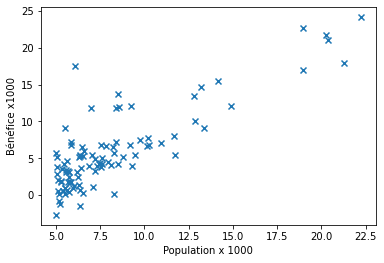

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement

    return (1 / 2) * (((X @ theta) - y) ** 2).mean()

In [6]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    
    sum = 0
    for i in range(len(X)):
        y_hat = 0
        for j in range(len(theta)):
            y_hat = X[i][j] * theta[j]
        sum = sum + (y_hat - y[i]) ** 2
    return (1 / 2) * sum[0] / len(X)

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
def gradientDescent(X, y, theta, alpha, iterations, early_stopping=False):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    
    epsilon = 1e-9
    costs = []
    gradients = []
    for i in range(iterations):
        y_hat = X @ theta
        
        error = y_hat - y
        
        cost = (1 / 2) * (error ** 2).mean()
        costs.append(cost)
        
        theta_grad = np.expand_dims((X * error).mean(axis=0), axis=1)
        gradients.append(theta_grad)
        theta = theta - alpha * theta_grad
        
        if early_stopping and np.absolute(theta_grad.mean()) < epsilon:
            break;
    
    return theta, np.asarray(costs), np.asarray(gradients)

In [8]:
def plot_cost_gradient(costs, gradients):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.subplot(1, 2, 2)
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])
    plt.xlabel('iterations')
    plt.ylabel('gardient')

In [9]:
def compare_to_sklearn(X, y, theta):
    sklearn_model_simple = LinearRegression()
    sklearn_model_simple.fit(X, y)
    
    print("sklearn model params :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
    print("our model params     :", theta)
    
    theta_sk = np.copy(sklearn_model_simple.coef_[0])
    theta_sk[0] = sklearn_model_simple.intercept_[0]
    theta_sk = np.reshape(theta_sk, (-1, 1))

    print("our model error     : ", computeCostNonVect(X, y, theta))
    print("sklearn model error : ", computeCostNonVect(X, y, theta_sk))

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [10]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [11]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [12]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta, costs, gradients = gradientDescent(X, y, theta, alpha, iterations);
theta

array([[-3.63029144],
       [ 1.16636235]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

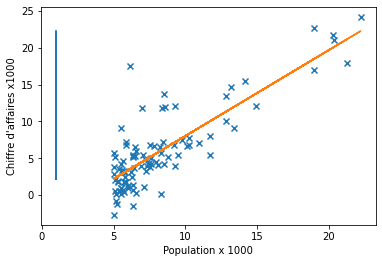

In [13]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Évolution du coût et du gradient

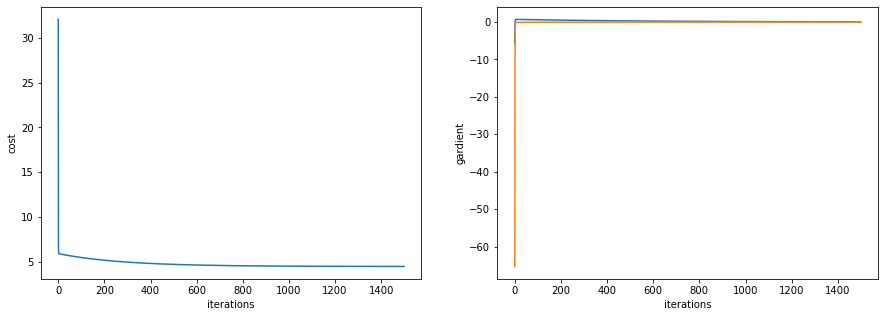

In [14]:
plot_cost_gradient(costs, gradients)

Traçage du coût en fonction de theta0 et theta1

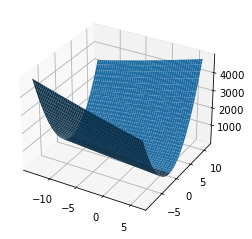

In [15]:
theta_0_range, theta_1_range = np.meshgrid(np.arange(theta[0] - 10, theta[0] + 10, 0.1), 
                                           np.arange(theta[1] - 10, theta[1] + 10, 0.1))
theta_mesh = np.expand_dims(np.stack((theta_0_range, theta_1_range), axis=-1), axis=3)
loss = np.asarray(
    [
        [computeCostNonVect(X, y, theta_mesh[i, j]) 
             for j in range(theta_mesh.shape[1])
        ] 
        for i in range(theta_mesh.shape[0])
    ]
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_range, theta_1_range, loss)

Prédire des valeurs de x

In [16]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.45197679])

In [17]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.53424501])

## Comparaison avec la classe de regression linéaire de Sklearn

In [18]:
sklearn_model_simple = LinearRegression()
sklearn_model_simple.fit(X, y)
print("sklearn model params :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
print("our model params     :", theta)

sklearn model params : (array([[0.        , 1.19303364]]), array([-3.89578088]))
our model params     : [[-3.63029144]
 [ 1.16636235]]


theta = [-3.63, 1.16]

sklearn_params = [-3.89, 1.19]

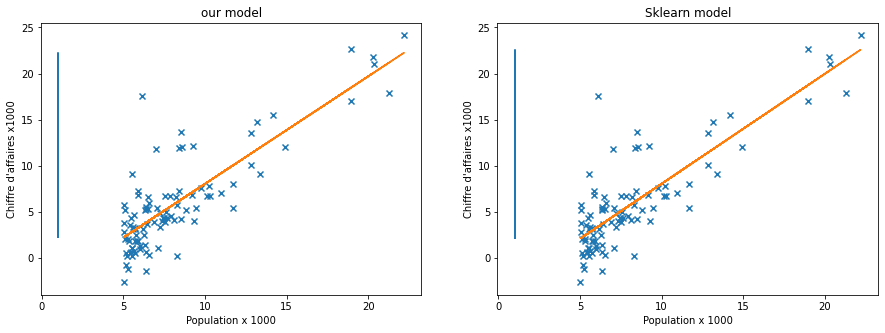

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1], y, marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.title('our model')
plt.plot(X,y_pred)
plt.subplot(1, 2, 2)
plt.scatter(X[:,1], y, marker ='x')
y_pred = sklearn_model_simple.predict(X)
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.title("Sklearn model")
plt.plot(X,y_pred)

Comparaison de l'erreur

In [20]:
theta_sk = np.copy(sklearn_model_simple.coef_[0])
theta_sk[0] = sklearn_model_simple.intercept_[0]
theta_sk = np.reshape(theta_sk, (2, 1))

print("our model error     : ", computeCostNonVect(X, y, theta))
print("sklearn model error : ", computeCostNonVect(X, y, theta_sk))

our model error     :  4.483388256587726
sklearn model error :  4.476971375975179


# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [21]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [22]:
# d'abord créer X et y
X = np.concatenate((np.ones((dataMulti.shape[0], 1)), dataMulti[:, :2]), axis=1)
y = dataMulti[:, 2:]

Mise à l'échelle des données (Normalisation)

In [23]:
X_max, X_min = X[:, 1:].max(axis=0), X[:, 1:].min(axis=0)
X_normalized = np.ones_like(X)
X_normalized[:, 1:] = (X[:, 1:] - X_min) / (X_max - X_min)

y_max, y_min = y.max(), y.min()
y_normalized = (y - y_max) / (y_max - y_min)

<strike>Normalisation</strike> Standardisation des données en moyenne = 0 <br>
source : https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [24]:
X_mean, X_std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)
X_standardized = np.ones_like(X)
X_standardized[:, 1:] = (X[:, 1:] - X_mean) / X_std

y_mean, y_std = y.mean(), y.std()
y_standardized = (y - y_mean) / y_std

Appliquer la descente du gradient à plusieurs variables

## Sans appliquer aucune transformation aux données

La regression linéraie avec un taux d'apprentissage à 0.001 ne converge pas car la différence entre les échelles est très importante.

L'apprentissage s'arrête avant de converger car le gradient devient très grand et on a une erreur d'overflow.

In [25]:
# paramètres
iterations = 1500;
# il faut changer le taux d'apprentissage car le gradient est énorme
# vu que les features ont différentes échelles
alpha = 0.001
theta = np.zeros((X.shape[1], 1), dtype=np.longlong)
# Appel
theta, costs, gradients = gradientDescent(X, 
                                          y, 
                                          theta, 
                                          alpha, 
                                          iterations)

C:\Users\РА\AppData\Local\Temp\ipykernel_3688\2668413690.py:13: RuntimeWarning: overflow encountered in square
  cost = (1 / 2) * (error ** 2).mean()
C:\Users\РА\AppData\Local\Temp\ipykernel_3688\2668413690.py:16: RuntimeWarning: overflow encountered in multiply
  theta_grad = np.expand_dims((X * error).mean(axis=0), axis=1)
C:\Users\РА\AppData\Local\Temp\ipykernel_3688\2668413690.py:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * theta_grad


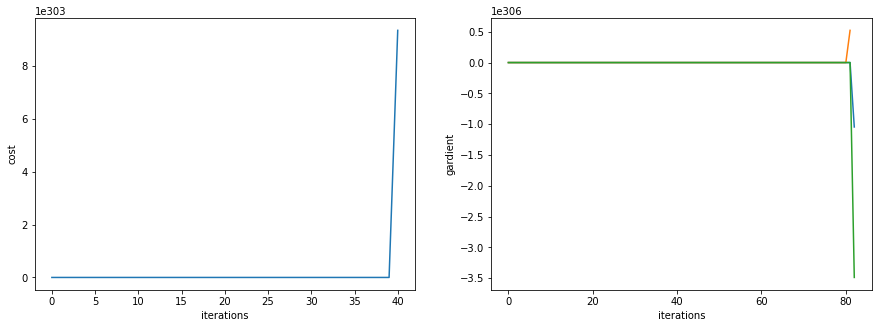

In [26]:
plot_cost_gradient(costs, gradients)

Avec une plus petite échelle 

In [27]:
# paramètres
iterations = 1500;
# il faut changer le taux d'apprentissage car le gradient est énorme
# vu que les features ont différentes échelles
alpha = 1e-9
theta = np.zeros((X.shape[1], 1), dtype=np.longlong)
# Appel
theta, costs, gradients = gradientDescent(X, 
                                          y, 
                                          theta, 
                                          alpha, 
                                          iterations)

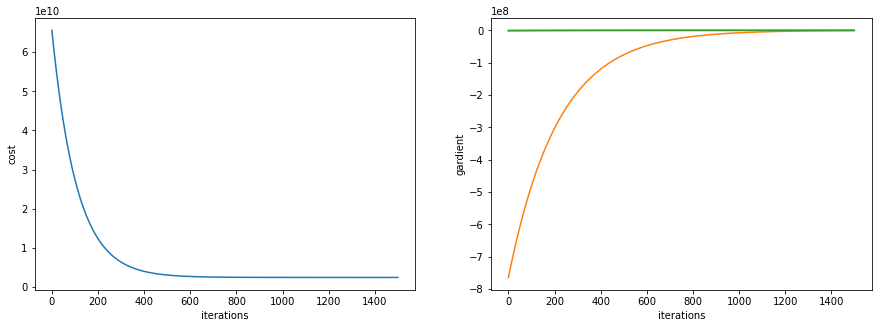

In [28]:
plot_cost_gradient(costs, gradients)

- **Comparaison avec Sklearn**

In [29]:
compare_to_sklearn(X, y, theta)

sklearn model params : (array([[    0.        ,   139.21063465, -8737.91542019]]), array([89597.765961]))
our model params     : [[8.58372035e-02]
 [1.65223889e+02]
 [2.63532650e-01]]
our model error     :  2397919689.912404
sklearn model error :  2043280477.3925703


## Avec les données normalisés

In [30]:
# paramètres
iterations = 1500
alpha_normalized = 0.01
theta_normalized = np.zeros((X.shape[1], 1))
# Appel
theta_normalized, costs_normalized, gradients_normalized = gradientDescent(X_normalized, 
                                                     #y_normalized, 
                                                     y,
                                                     theta_normalized, 
                                                     alpha_normalized, 
                                                     iterations)

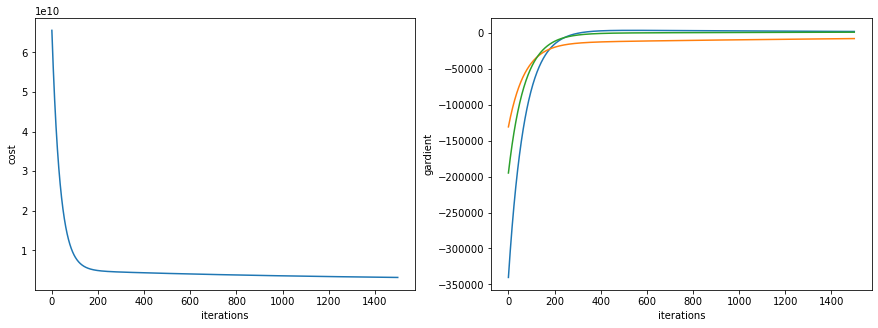

In [31]:
plot_cost_gradient(costs_normalized, gradients_normalized)

- **Comparaison avec Sklearn**

In [32]:
compare_to_sklearn(X_normalized, y, theta_normalized)

sklearn model params : (array([[     0.        , 504777.76124214, -34951.66168075]]), array([199467.3112629]))
our model params     : [[193496.83442894]
 [242857.60855128]
 [132750.2686926 ]]
our model error     :  3152329660.4728413
sklearn model error :  2043280477.3925703


## Avec les données standardisés

In [33]:
# paramètres
iterations = 1500;
alpha_standardized = 0.01;
theta_standardized = np.zeros((X.shape[1], 1))
# Appel
theta_standardized, costs_standardized, gradients_standardized = gradientDescent(X_standardized, 
                                                       #y_standardized, 
                                                       y,
                                                       theta_standardized, 
                                                       alpha_standardized, 
                                                       iterations);

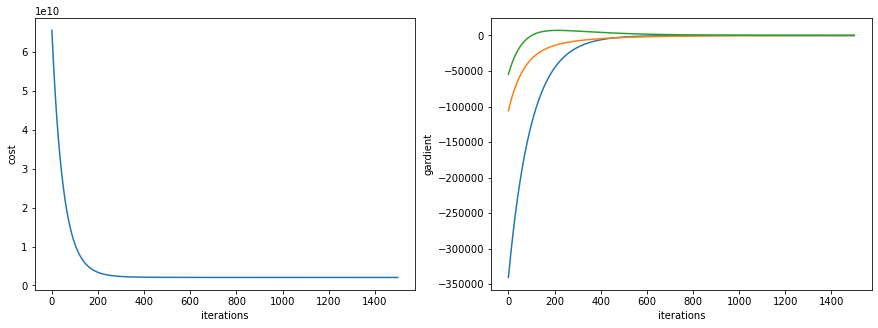

In [34]:
plot_cost_gradient(costs_standardized, gradients_standardized)

In [35]:
compare_to_sklearn(X_standardized, y, theta_standardized)

sklearn model params : (array([[     0.        , 109447.76551898,  -6578.27679028]]), array([340412.76595745]))
our model params     : [[340412.66939734]
 [109370.02582704]
 [ -6500.53710423]]
our model error     :  2043283136.7175007
sklearn model error :  2043280477.3925703


## Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul (le temps de calcul n'est pas affecté par l'échelle des données, il est seulement affecté par le nombre d'opérations effectuées)
- Comparaison de l'evolution des erreurs de chaque modèle avec l'évolution des itérations

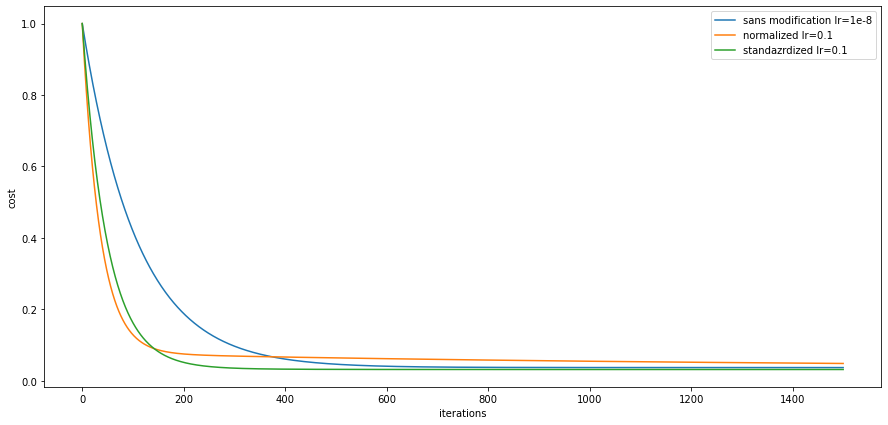

In [36]:
plt.figure(figsize=(15, 7))
maximum_loss = max(costs.max(), costs_normalized.max(), costs_standardized.max())
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(range(costs.shape[0]), costs / maximum_loss, label='sans modification lr=1e-8')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(range(costs_normalized.shape[0]), costs_normalized / maximum_loss, label='normalized lr=0.1')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(range(costs_standardized.shape[0]), costs_standardized / maximum_loss, label='standazrdized lr=0.1')
plt.legend()

La standardisation (mean 0, std 1) produit la convergence la plus rapdie, suivie de l'approche sans modification et puis la normalisation en dernier.

Cependant, il faut compter le fait que les données non modifiés sont entrainées avec un taux d'apprentissage très petit pour lui permettre de garder une convergence stable.

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

On peut tenter d'utiliser une autre erreur comme la somme des carrés et voir son effet sur la convergence.

La fonction d'energie devient :

$J(\Theta) = \sum_{i} (ŷ^{i} - y^{i})^{2}$

$\frac{\partial J(\Theta)}{\partial \theta_{j}} = 2 \sum_{i} (ŷ^{i} - y^{i})x_{j}^{i}$

In [37]:
def gradientDescentModified(X, y, theta, alpha, iterations, early_stopping=False):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    
    epsilon = 1e-9
    costs = []
    gradients = []
    for i in range(iterations):
        y_hat = X @ theta
        
        error = y_hat - y
        
        cost = (error ** 2).sum()
        costs.append(cost)
        
        theta_grad = np.expand_dims(2 * (X * error).sum(axis=0), axis=1)
        gradients.append(theta_grad)
        theta = theta - alpha * theta_grad
        
        if early_stopping and np.absolute(theta_grad.mean()) < epsilon:
            break;
    
    return theta, np.asarray(costs), np.asarray(gradients)

In [38]:
# paramètres
iterations = 1500;
# il faut changer le taux d'apprentissage car le gradient est énorme
# vu que les features ont différentes échelles
alpha = 1e-9
theta = np.zeros((X.shape[1], 1), dtype=np.longlong)
# Appel
theta, costs, gradients = gradientDescentModified(X, 
                                          y, 
                                          theta, 
                                          alpha, 
                                          iterations)

# paramètres
iterations = 1500
alpha_normalized = 0.01
theta_normalized = np.zeros((X.shape[1], 1))
# Appel
theta_normalized, costs_normalized, gradients_normalized = gradientDescentModified(X_normalized, 
                                                     #y_normalized, 
                                                     y,
                                                     theta_normalized, 
                                                     alpha_normalized, 
                                                     iterations)

# paramètres
iterations = 1500;
alpha_standardized = 0.01;
theta_standardized = np.zeros((X.shape[1], 1))
# Appel
theta_standardized, costs_standardized, gradients_standardized = gradientDescentModified(X_standardized, 
                                                       #y_standardized, 
                                                       y,
                                                       theta_standardized, 
                                                       alpha_standardized, 
                                                       iterations);

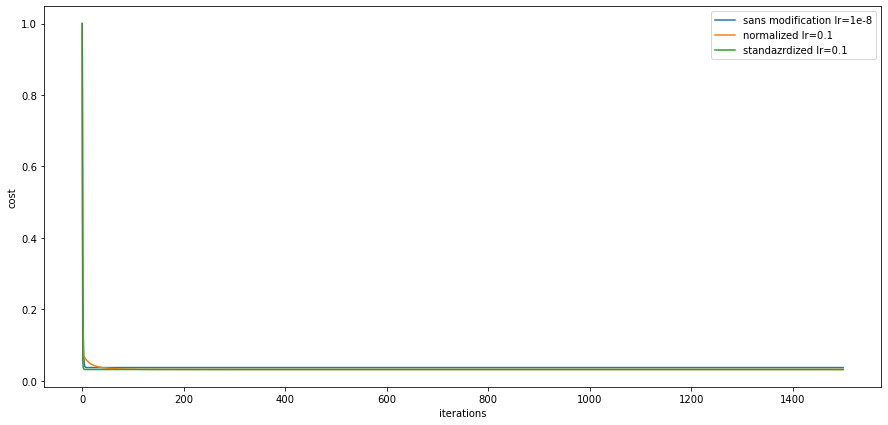

In [39]:
plt.figure(figsize=(15, 7))
maximum_loss = max(costs.max(), costs_normalized.max(), costs_standardized.max())
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(range(costs.shape[0]), costs / maximum_loss, label='sans modification lr=1e-8')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(range(costs_normalized.shape[0]), costs_normalized / maximum_loss, label='normalized lr=0.1')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(range(costs_standardized.shape[0]), costs_standardized / maximum_loss, label='standazrdized lr=0.1')
plt.legend()

La convegence est bien plus rapide, et prend bien moins d'itération que cette d'avant, et cela pour les 3 méthodes.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [40]:
# bonne chance